In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# display setting
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

train_path = "/Users/matilda/Documents/Project/ML/heart_disease/data/train.csv"
test_path  = "/Users/matilda/Documents/Project/ML/heart_disease/data/test.csv"

train = pd.read_csv(train_path)
test  = pd.read_csv(test_path)

train.shape, test.shape


((630000, 15), (270000, 14))

In [14]:
train.head()


,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [15]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Hear

In [16]:
train.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,630000.0,NaN,NaN,NaN,314999.5,181865.479132,0.0,157499.75,314999.5,472499.25,629999.0
Age,630000.0,NaN,NaN,NaN,54.136706,8.256301,29.0,48.0,54.0,60.0,77.0
Sex,630000.0,NaN,NaN,NaN,0.714735,0.451541,0.0,0.0,1.0,1.0,1.0
Chest pain type,630000.0,NaN,NaN,NaN,3.312752,0.851615,1.0,3.0,4.0,4.0,4.0
BP,630000.0,NaN,NaN,NaN,130.497433,14.975802,94.0,120.0,130.0,140.0,200.0
Cholesterol,630000.0,NaN,NaN,NaN,245.011814,33.681581,126.0,223.0,243.0,269.0,564.0
FBS over 120,630000.0,NaN,NaN,NaN,0.079987,0.271274,0.0,0.0,0.0,0.0,1.0
EKG results,630000.0,NaN,NaN,NaN,0.98166,0.998783,0.0,0.0,0.0,2.0,2.0
Max HR,630000.0,NaN,NaN,NaN,152.816763,19.112927,71.0,142.0,157.0,166.0,202.0
Exercise angina,630000.0,NaN,NaN,NaN,0.273725,0.44587,0.0,0.0,0.0,1.0,1.0


In [17]:
train.duplicated().sum()


np.int64(0)

In [21]:
set(train.columns) - set(test.columns), set(test.columns) - set(train.columns)


({'Heart Disease'}, set())

In [23]:
missing = train.isna().sum().sort_values(ascending=False)
missing[missing > 0]


Series([], dtype: int64)

In [24]:
train["Heart Disease"].value_counts()


Heart Disease
Absence     347546
Presence    282454
Name: count, dtype: int64

In [25]:
(train["Heart Disease"].value_counts(normalize=True) * 100).round(2)


Heart Disease
Absence     55.17
Presence    44.83
Name: proportion, dtype: float64

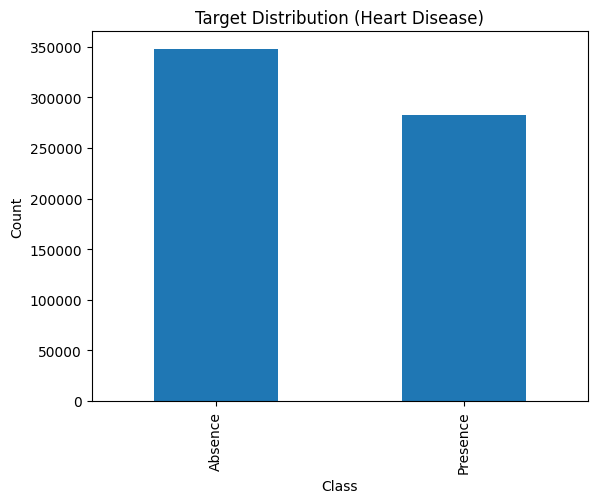

In [26]:
ax = train["Heart Disease"].value_counts().plot(kind="bar")
ax.set_title("Target Distribution (Heart Disease)")
ax.set_xlabel("Class")
ax.set_ylabel("Count")
plt.show()


In [51]:

numeric_cols = train[[
    "Age", "BP", "Cholesterol",
    "Max HR", "ST depression"
]].columns.tolist()

categorical_cols = train[[
    "Sex", "Chest pain type", "FBS over 120",
    "EKG results", "Exercise angina",
    "Slope of ST", "Number of vessels fluro",
    "Thallium"
]].columns.tolist()

numeric_cols, categorical_cols

(['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression'],
 ['Sex',
  'Chest pain type',
  'FBS over 120',
  'EKG results',
  'Exercise angina',
  'Slope of ST',
  'Number of vessels fluro',
  'Thallium'])

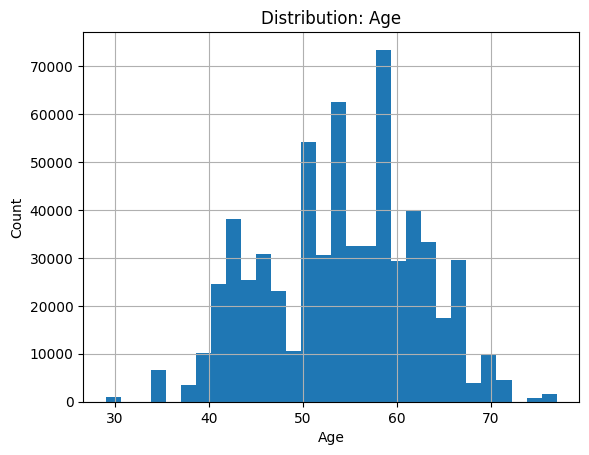

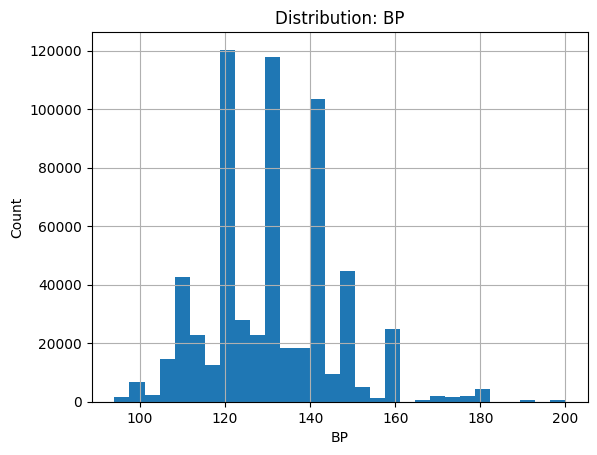

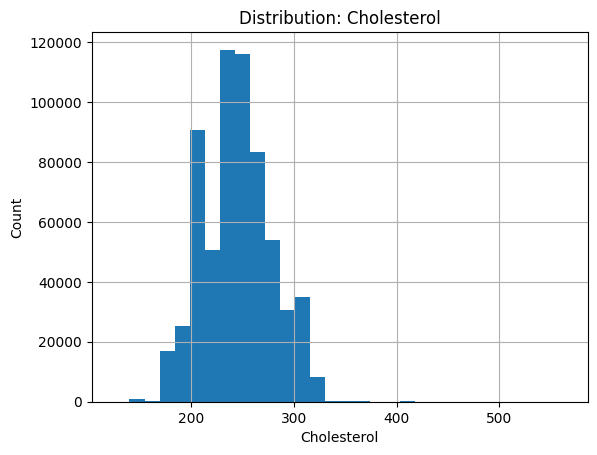

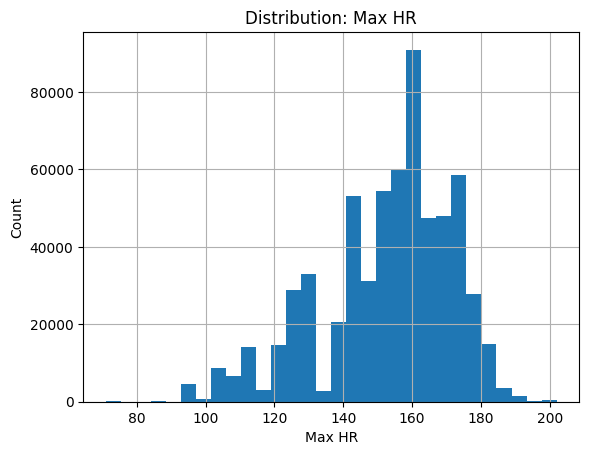

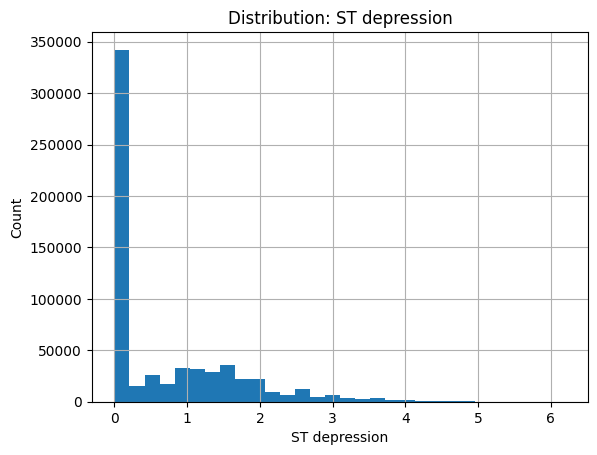

In [52]:
for col in numeric_cols:
    plt.figure()
    train[col].hist(bins=30)
    plt.title(f"Distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


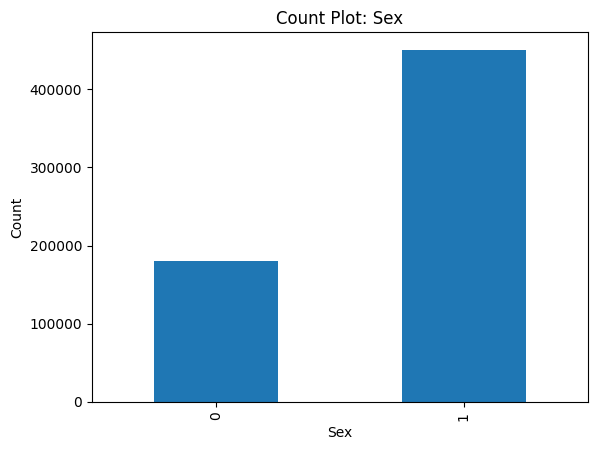

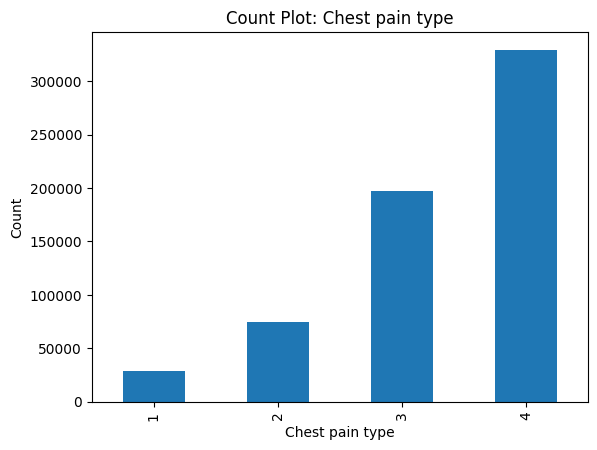

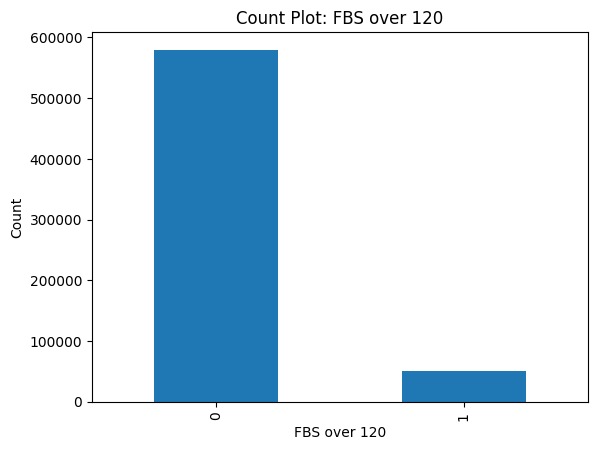

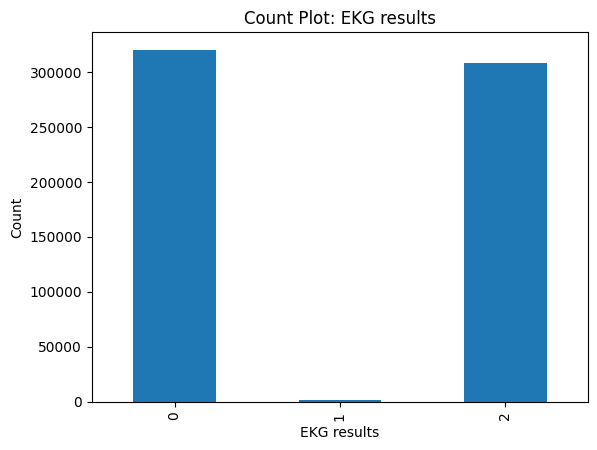

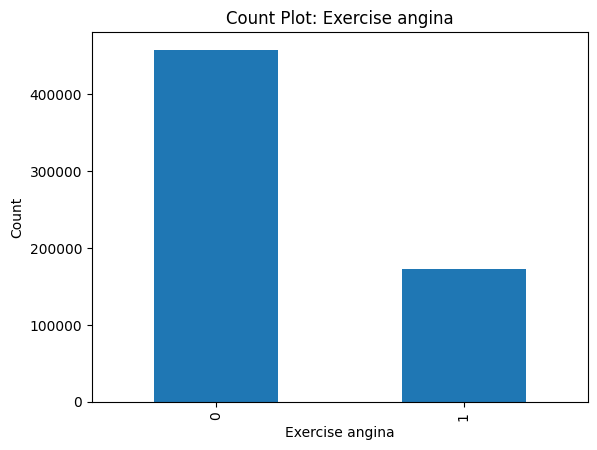

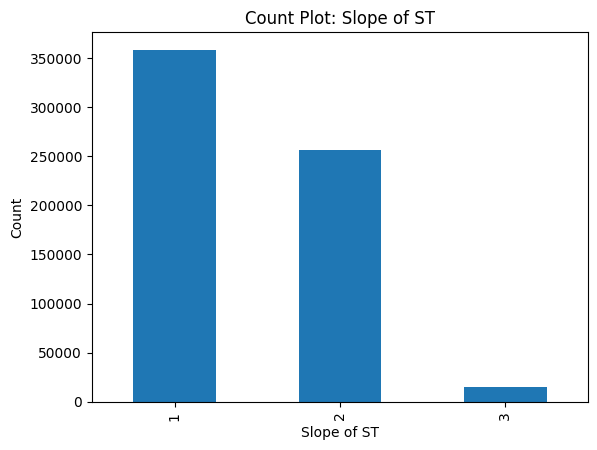

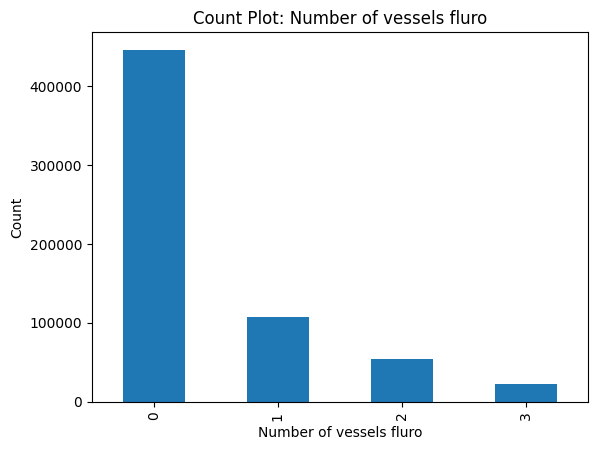

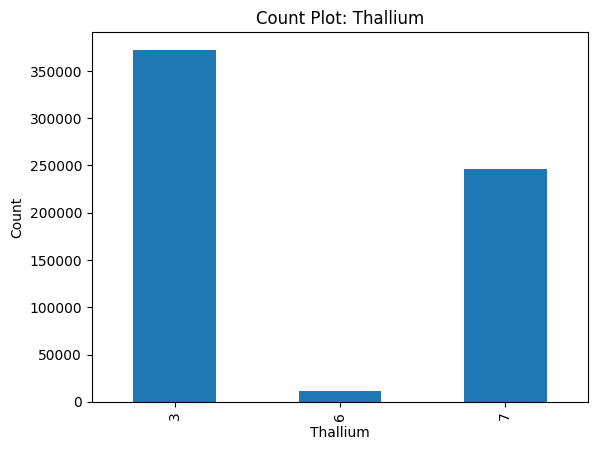

In [53]:
for col in categorical_cols:
    plt.figure()
    train[col].value_counts().sort_index().plot(kind="bar")
    plt.title(f"Count Plot: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


In [54]:
df = train.copy()
df["target"] = df["Heart Disease"].map({"Absence": 0, "Presence": 1})
df["target"].value_counts()


target
0    347546
1    282454
Name: count, dtype: int64

In [55]:
summary = df.groupby("target")[numeric_cols].agg(["mean", "median"]).T
summary


target                         0           1
Age           mean     52.558093   56.079114
              median   52.000000   57.000000
BP            mean    130.567381  130.411366
              median  130.000000  130.000000
Cholesterol   mean    242.499102  248.103585
              median  239.000000  246.000000
Max HR        mean    160.415105  143.467372
              median  162.000000  146.000000
ST depression mean      0.347808    1.169104
              median    0.000000    1.200000

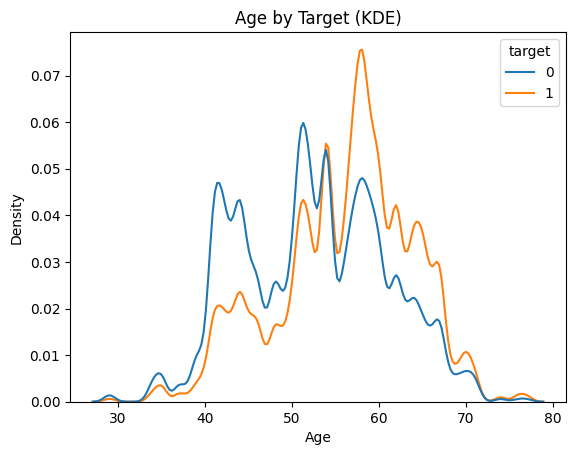

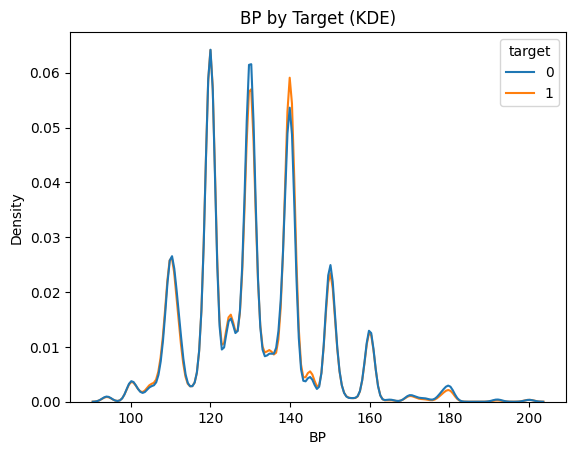

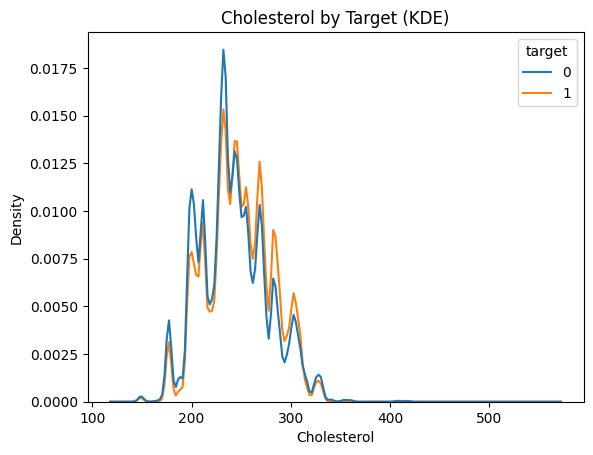

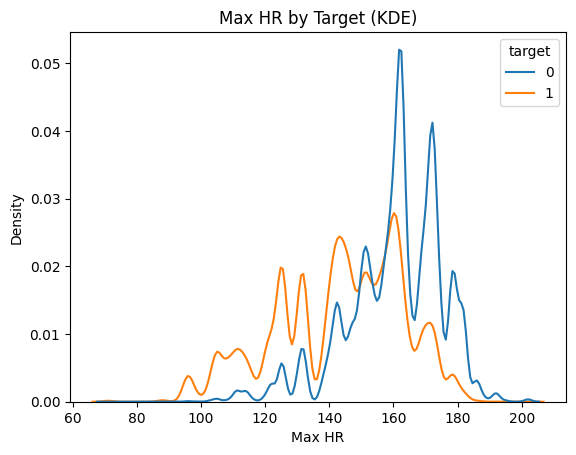

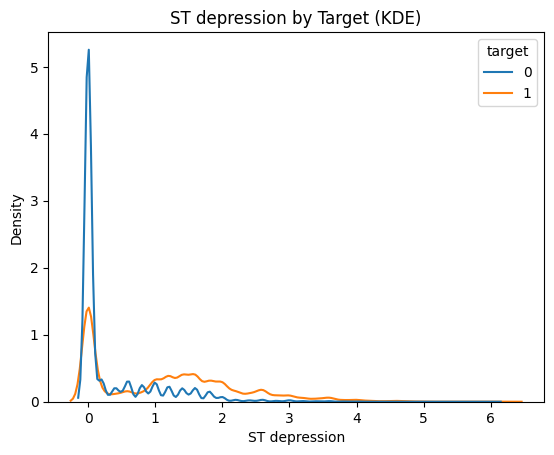

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure()
    sns.kdeplot(data=df, x=col, hue="target", common_norm=False)
    plt.title(f"{col} by Target (KDE)")
    plt.show()


Sex
1    0.555933
0    0.178764
Name: target, dtype: float64

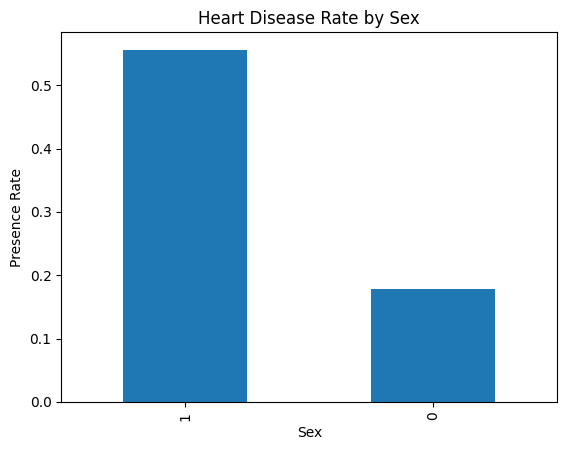

Chest pain type
4    0.697478
3    0.190665
2    0.162181
1    0.108069
Name: target, dtype: float64

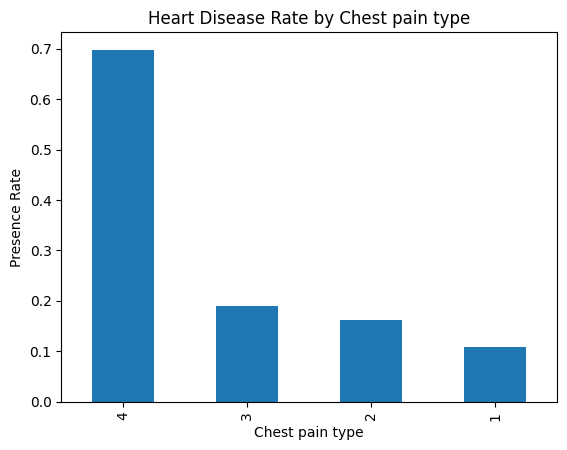

FBS over 120
1    0.504961
0    0.443417
Name: target, dtype: float64

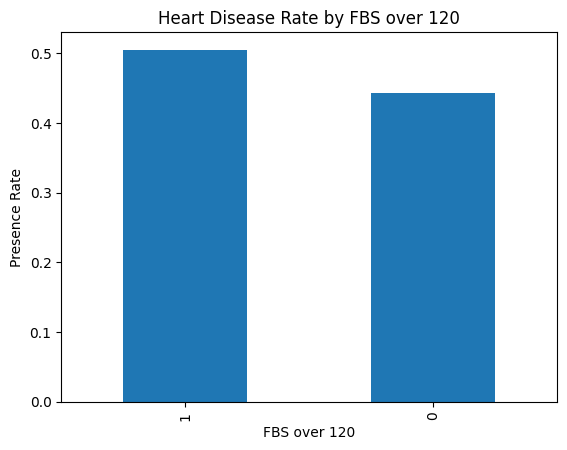

EKG results
2    0.559560
1    0.360061
0    0.341498
Name: target, dtype: float64

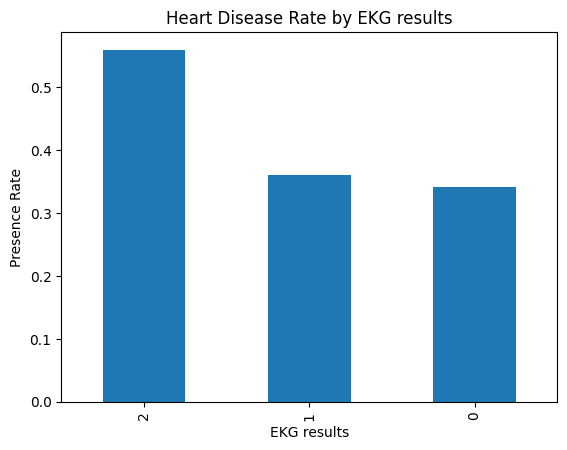

Exercise angina
1    0.806288
0    0.313433
Name: target, dtype: float64

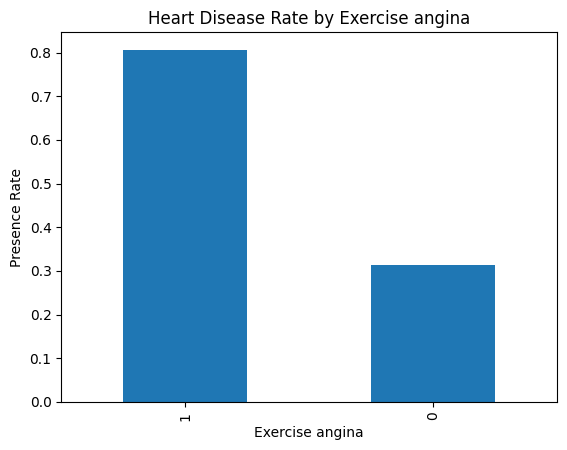

Slope of ST
3    0.721082
2    0.692067
1    0.262257
Name: target, dtype: float64

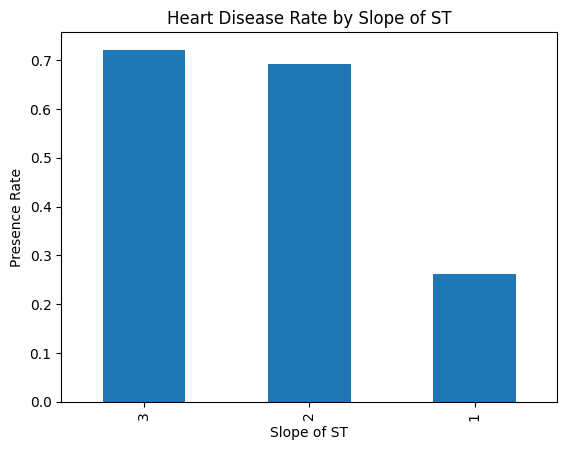

Number of vessels fluro
3    0.899549
2    0.897078
1    0.729346
0    0.303132
Name: target, dtype: float64

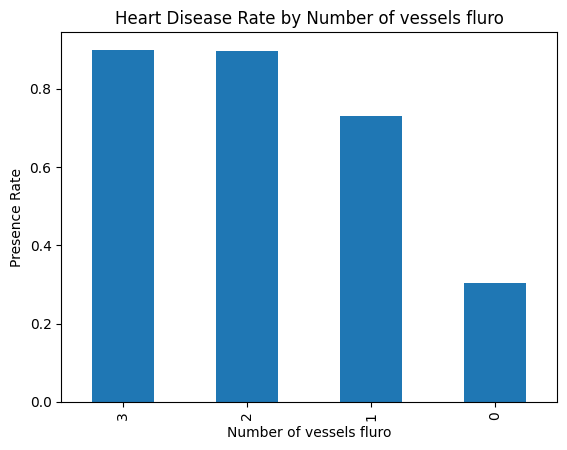

Thallium
7    0.815391
6    0.686394
3    0.198049
Name: target, dtype: float64

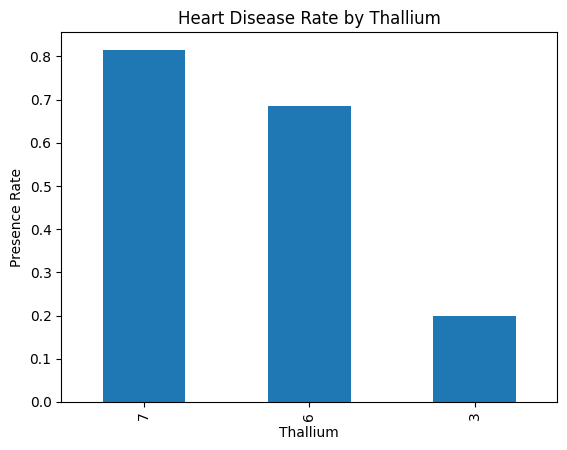

In [58]:
for col in categorical_cols:
    rate = df.groupby(col)["target"].mean().sort_values(ascending=False)
    display(rate)

    plt.figure()
    rate.plot(kind="bar")
    plt.title(f"Heart Disease Rate by {col}")
    plt.xlabel(col)
    plt.ylabel("Presence Rate")
    plt.show()


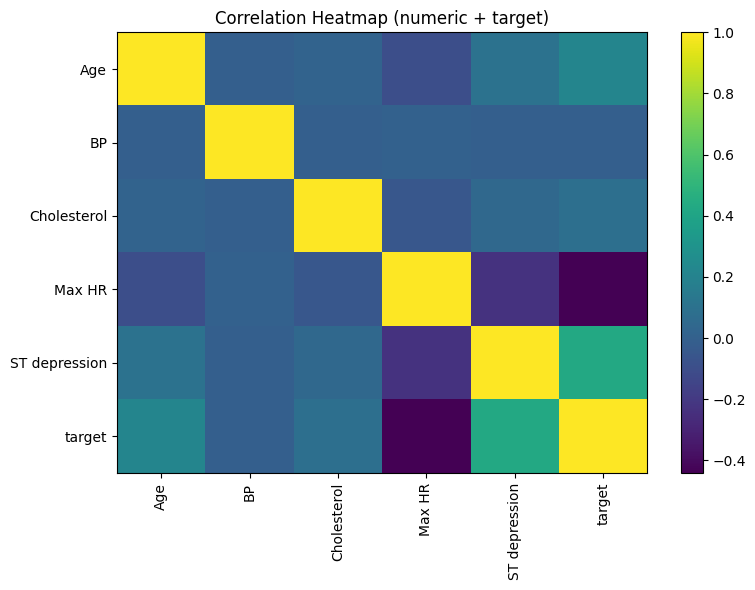

In [59]:
corr_cols = numeric_cols + ["target"]
corr = df[corr_cols].corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, aspect="auto")
plt.xticks(range(len(corr_cols)), corr_cols, rotation=90)
plt.yticks(range(len(corr_cols)), corr_cols)
plt.colorbar()
plt.title("Correlation Heatmap (numeric + target)")
plt.tight_layout()
plt.show()


In [61]:

q = df[numeric_cols].quantile([0.01, 0.99]).T
q.columns = ["p01", "p99"]
q


,p01,p99
Age,35.0,71.0
BP,100.0,178.0
Cholesterol,177.0,325.0
Max HR,103.0,182.0
ST depression,0.0,3.6


In [ ]:
Exploratory Data Analysis (EDA) Summary
1️⃣ Dataset Overview

The training dataset contains 630,000 samples and 15 columns (including ID and target).

The target variable ("Heart Disease") is relatively balanced:

Absence: 55.17%

Presence: 44.83%

Class imbalance is not severe, therefore resampling techniques (e.g., SMOTE) are not immediately necessary.

2️⃣ Numerical Features Analysis
🔹 Age

Patients with heart disease are generally older.

Mean Age:

No disease: 52.56

Disease: 56.08

KDE plots show a noticeable right shift for the Presence group.

Age is positively correlated with heart disease.

👉 Interpretation: Age is a moderate risk factor.

🔹 Blood Pressure (BP)

Mean BP is nearly identical between classes.

No strong separation observed in distribution plots.

Correlation with target is weak.

👉 Interpretation: BP alone may not be a strong predictor.

🔹 Cholesterol

Slightly higher in the disease group.

Some overlap between classes.

Weak-to-moderate correlation with target.

👉 Interpretation: Cholesterol contributes predictive signal but is not dominant.

🔹 Maximum Heart Rate (Max HR)

Strong separation observed between groups.

Mean Max HR:

No disease: ~160

Disease: ~143

Negative correlation with target.

KDE plots show clear class shift.

👉 Interpretation: Max HR is a strong predictive feature.

🔹 ST Depression

One of the strongest distinguishing features.

Mean ST depression:

No disease: 0.35

Disease: 1.17

Strong positive correlation with target.

Distribution clearly shifted in disease group.

👉 Interpretation: ST depression is likely one of the most important predictors.

3️⃣ Categorical Features Analysis
🔹 Sex

Male patients show significantly higher disease rate (~55.6%) compared to females (~17.9%).

👉 Strong gender-based risk pattern.

🔹 Chest Pain Type

Disease rates:

Type 4: ~69.7%

Type 3: ~19.1%

Type 2: ~16.2%

Type 1: ~10.8%

👉 Chest pain type 4 is highly associated with heart disease.

🔹 FBS over 120

Slightly higher disease rate when FBS = 1.

Difference is modest.

👉 Weak-to-moderate predictor.

🔹 EKG Results

Category 2 shows higher disease prevalence (~55.9%).

Category 0 lowest (~34.1%).

👉 Some predictive power present.

🔹 Exercise-Induced Angina

Very strong signal:

With angina: ~80.6% disease rate

Without angina: ~31.3%

👉 One of the strongest categorical predictors.

🔹 Slope of ST

Categories 2 and 3 show high disease rates (~70%).

Category 1 much lower (~26%).

👉 Strong predictive categorical feature.

🔹 Number of Vessels (Fluro)

Disease rate increases sharply with vessel count:

0 vessels: ~30%

1 vessel: ~73%

2 vessels: ~89%

3 vessels: ~90%

👉 Extremely strong predictor.

🔹 Thallium

Value 7: ~81.5%

Value 6: ~68.6%

Value 3: ~19.8%

👉 Strong categorical signal.

4️⃣ Correlation Analysis

ST depression shows strongest positive correlation with target.

Max HR shows strong negative correlation.

Age shows mild positive correlation.

BP shows minimal correlation.

No severe multicollinearity observed among numeric features.

5️⃣ Outlier Analysis

Using 1st and 99th percentiles:

Age range: 35 – 71

BP range: 100 – 178

Cholesterol range: 177 – 325

Max HR range: 103 – 182

ST depression range: 0 – 3.6

No extreme abnormal outliers detected.

🎯 Key Insights

ST depression and Max HR are the strongest continuous predictors.

Number of vessels, Exercise angina, Chest pain type, and Thallium show extremely strong categorical signals.

BP appears weak as a standalone feature.

The dataset is well-balanced and clean.

Tree-based models are likely to perform well due to nonlinear relationships.

In [ ]:
During EDA, I found that ST depression and Max Heart Rate show the strongest separation between classes. Categorical features such as number of vessels and exercise-induced angina demonstrate extremely high disease rates. In contrast, blood pressure shows limited predictive power. These findings suggest that nonlinear models such as Random Forest or XGBoost may perform particularly well.